<a href="https://colab.research.google.com/github/edcalderin/Music_Genre_Classification/blob/master/3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Genre Classification. EDA (Exploratory Data Analysis)

## Importing modules

In [ ]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 10.1 MB/s 
     |████████████████████████████████| 9.0 MB 38.6 MB/s 
     |████████████████████████████████| 79 kB 8.6 MB/s 
     |████████████████████████████████| 139 kB 70.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.11 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import joblib
import yaml
import boto3
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Functions

### Fn: Load credentials

In [ ]:
PATH = '/gdrive/MyDrive/Preparacion_Audio_Data_Mining/Tests/Genre_classification/'

def load_credentials():
    with open(PATH+'credentials.yaml', 'r') as file:
        credentials = yaml.load(file)
    
    return credentials

credentials = load_credentials()

### Fn: Get S3 Bucket

In [ ]:
def get_s3_bucket():

    session = boto3.Session(
        aws_access_key_id=credentials['S3']['aws_access_key_id'],
        aws_secret_access_key=credentials['S3']['aws_secret_access_key'], 
        aws_session_token=credentials['S3']['aws_session_token']
    )

    resource = session.resource('s3')

    return resource.Bucket(credentials['S3']['BUCKET_NAME'])

### Fn: Get Dataframes from Bucket

In [ ]:
def get_dataframe_from_s3(key):
    
    bucket = get_s3_bucket()
    
    with BytesIO() as data_bytes:
        bucket.download_fileobj(key, data_bytes)
        data_bytes.seek(0)
    
        df = joblib.load(data_bytes)
    
    return df

## Get data

In [ ]:
bucket = get_s3_bucket()
for item in bucket.objects.filter(Prefix='cleaning/'):
    print(item.key)

cleaning/genre_mel_spec_cleaned.joblib
cleaning/numerical_features_genre_cleaned.joblib


In [ ]:
PATH_MEL_GENRE_SPEC = 'cleaning/numerical_features_genre_cleaned.joblib'

df = get_dataframe_from_s3(PATH_MEL_GENRE_SPEC)
df.head()

,files,label,mfcc_0,mfcc_1,mfcc_10,mfcc_11,mfcc_12,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,spectral_centroid,spectral_rolloff,zero_crossing_rate,y
0,blues.00082.wav,blues,-29.326496,108.646187,-12.076519,5.475782,-7.672954,-25.548882,38.452442,-18.309029,21.787041,-25.132904,22.377872,-17.582579,14.664047,2141.518182,4628.622798,0.105125,9
1,blues.00056.wav,blues,-145.280975,102.806641,-6.934700,7.458768,-10.468451,-12.529431,57.005886,2.262869,26.585436,-4.288538,17.328524,-7.993435,15.229498,1811.771254,3928.818677,0.075503,9
2,blues.00004.wav,blues,-160.337708,126.219635,-13.088418,-2.813867,-6.933385,-35.587811,22.148071,-32.478603,10.852294,-23.352331,0.498433,-11.793437,1.207255,1835.004266,3579.757627,0.101461,9
3,blues.00075.wav,blues,-86.477364,92.698875,-7.043209,12.178524,-6.086116,-15.325850,54.053925,0.895361,31.571152,-14.603640,23.317848,-14.964167,15.332833,2224.110737,4700.233605,0.108509,9
4,blues.00025.wav,blues,-249.284561,131.004684,-0.981921,-3.575790,-2.926955,0.671435,66.703934,17.914803,4.621686,6.613105,1.242521,1.412567,-1.589808,1109.352784,2243.341758,0.051697,9


## EDA

In [ ]:
df.describe()

,mfcc_0,mfcc_1,mfcc_10,mfcc_11,mfcc_12,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,spectral_centroid,spectral_rolloff,zero_crossing_rate,y
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,-144.505844,99.532051,-6.023452,4.476333,-4.796791,-8.926098,36.307800,-1.148532,14.642556,-5.130925,10.126691,-6.998759,7.733588,2202.312978,4572.657920,0.103651,4.500501
std,100.274216,31.338671,6.820011,6.717547,6.173204,21.700764,16.665932,12.226904,11.842049,9.945260,10.465808,8.286738,7.940373,716.121369,1575.189914,0.041824,2.875114
min,-552.120056,-1.461542,-28.057501,-15.796446,-27.523129,-89.870193,-18.727547,-38.890350,-28.415911,-32.930431,-24.915823,-31.640574,-12.050179,570.040355,749.140636,0.021697,0.000000
25%,-200.891144,76.779915,-10.966475,-0.550384,-9.360345,-24.223495,24.136429,-9.991120,5.095714,-12.873066,1.607538,-13.255445,1.617634,1626.415517,3379.909351,0.070374,2.000000
50%,-120.302437,98.450729,-5.933024,3.876360,-4.219116,-10.733117,36.977928,-0.037814,15.044655,-5.719224,9.671143,-7.582522,7.135113,2209.483104,4658.666029,0.099503,5.000000
75%,-73.770947,119.812057,-1.028598,9.709097,-0.157844,5.541733,48.267706,7.935423,23.852896,2.980938,18.721800,-0.377958,14.387069,2691.930754,5534.087328,0.132097,7.000000
max,42.039433,193.097397,17.421560,23.034859,13.051313,56.682800,80.702301,31.440584,45.173172,21.827339,49.011353,19.133009,27.212437,4435.243901,8677.672688,0.274631,9.000000


## Plots

In [ ]:
ZIP_PATH = PATH + 'genres_data.zip'

!unzip -q $ZIP_PATH

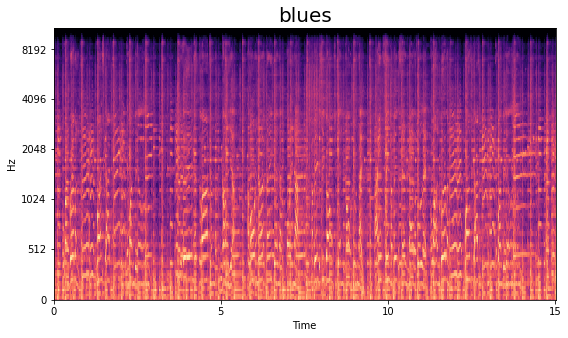

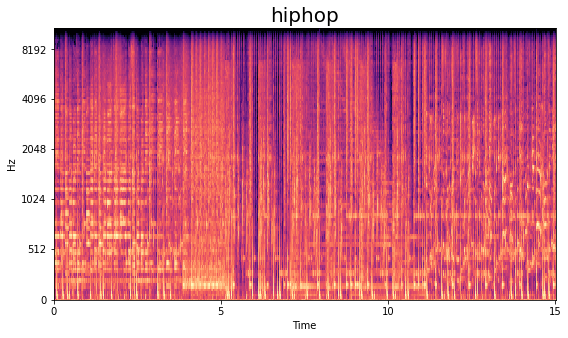

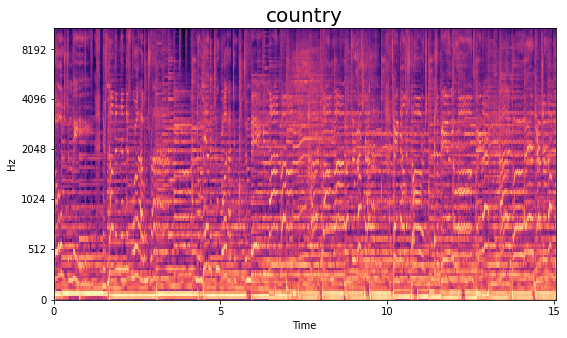

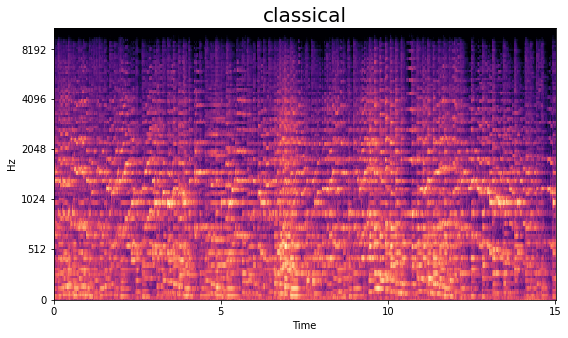

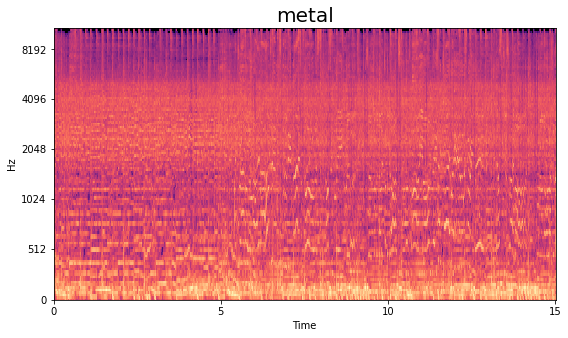

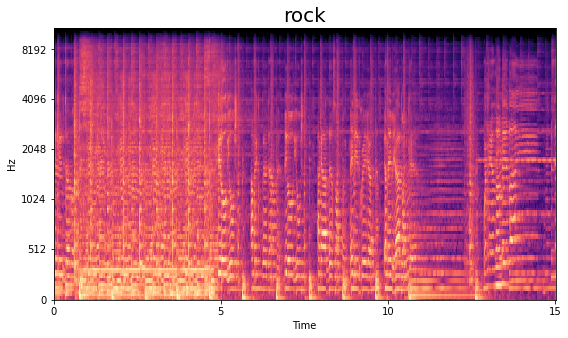

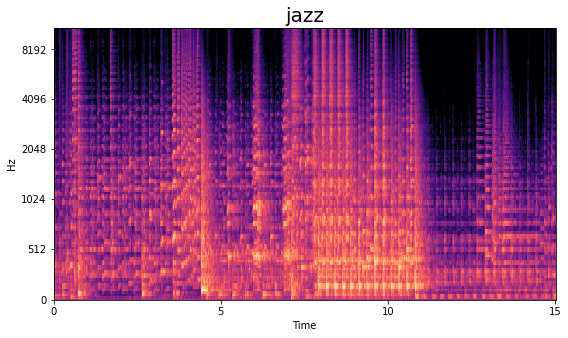

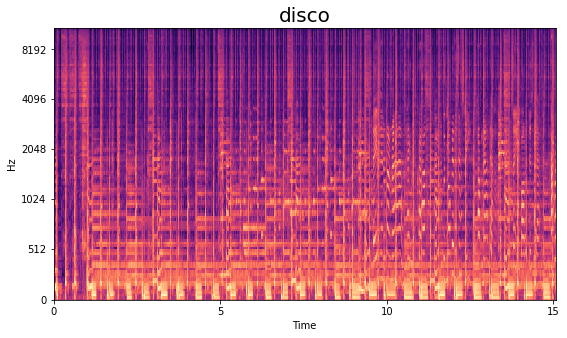

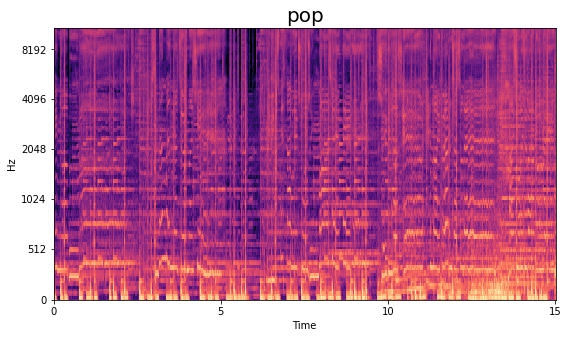

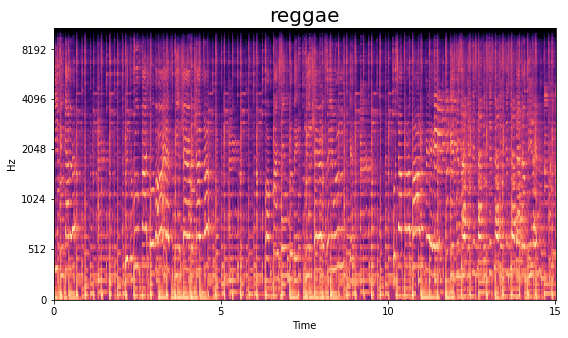

In [ ]:
def get_spect(genre):
    path_song = f'./genres_data/{genre}/{genre}.00000.wav'
    
    y, sr = librosa.core.load(path_song)
    
    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    return librosa.power_to_db(spect, ref=np.max)

def plot_spectogram(genre):
    spect = get_spect(genre)    

    plt.figure(figsize=(9,5))
    librosa.display.specshow(spect, x_axis='time', y_axis='mel')
    plt.title(genre, fontdict={'fontsize':20})
    plt.show()

for genre in df.label.unique():
    plot_spectogram(genre)

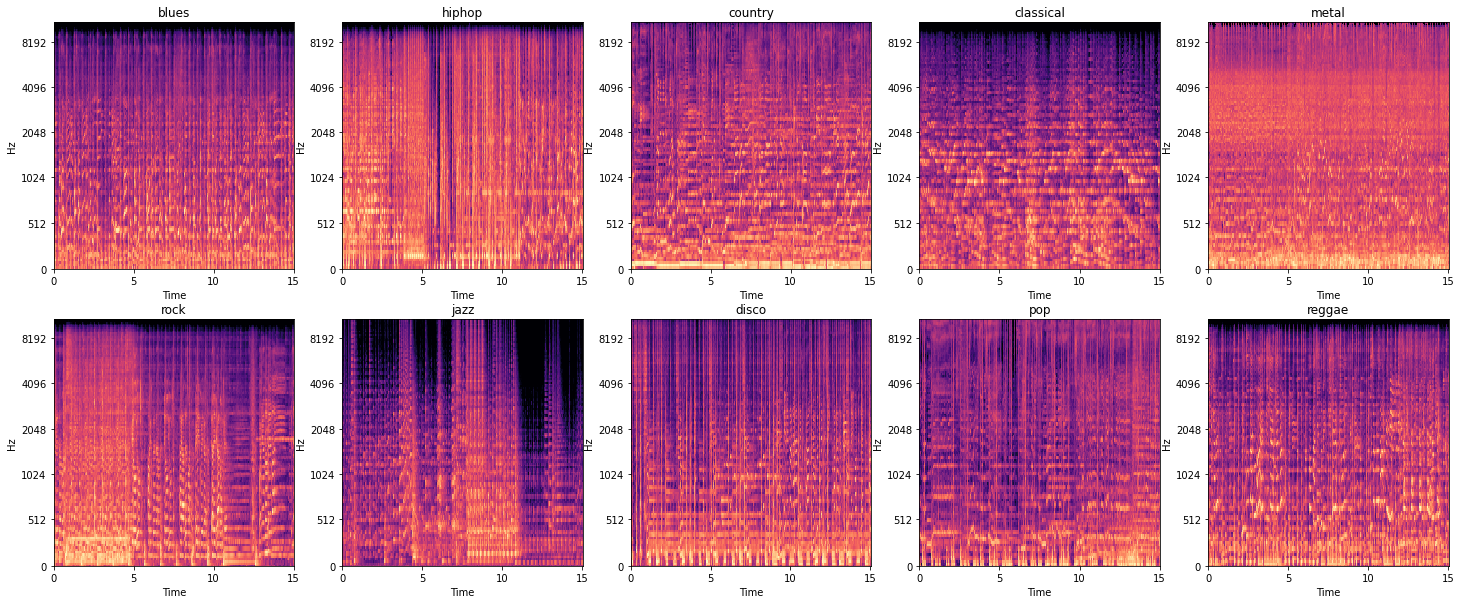

In [ ]:
def plot_spectogram(genre, ax):
    spect = get_spect(genre)

    librosa.display.specshow(spect, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(genre)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

for genre, axis in zip(df.label.unique(), ax.flatten()):
    plot_spectogram(genre, axis)

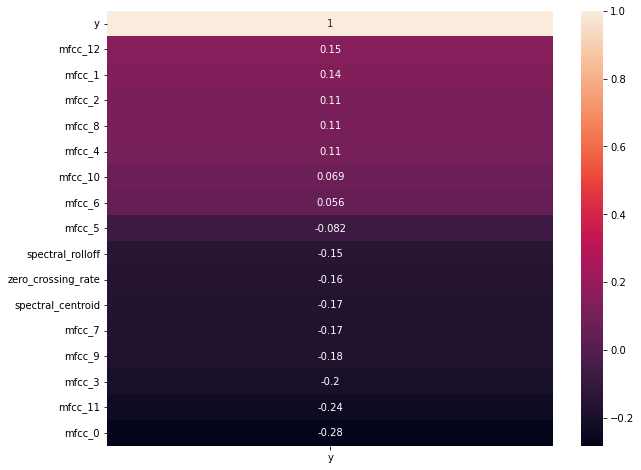

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr()[['y']].sort_values(by='y', ascending=False), annot=True)